# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [4]:
# 구글 드라이브 연결, 패스 지정
"""
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'
    """

"\nimport sys\nif 'google.colab' in sys.modules:\n    from google.colab import drive\n    drive.mount('/content/drive')\n    path = '/content/drive/MyDrive/project/'\n    "

### (3) 한글 폰트 표시용 라이브러리 설치

In [7]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [9]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [18]:
# 파일 불러오기
apart = joblib.load(path+'base_data0.pkl')
apart

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총전용면적,면적10~30,면적30~40,면적40~50,면적50~60,면적60~70,면적70~80,면적80~200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙난방,전체동 설치,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙가스난방,전체동 설치,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역가스난방,전체동 설치,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별가스난방,전체동 설치,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


#### 2) 기본 정보 조회

In [20]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int32  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총전용면적     345 non-null    float64
 9   면적10~30   345 non-null    int64  
 10  면적30~40   345 non-null    int64  
 11  면적40~50   345 non-null    int64  
 12  면적50~60   345 non-null    int64  
 13  면적60~70   345 non-null    int64  
 14  면적70~80   345 non-null    int64  
 15  면적80~200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int32(1), int64(9), object(5)
memory usage: 47.3+ KB


In [22]:
apart.describe()

,총세대수,준공연도,실차량수,총전용면적,면적10~30,면적30~40,면적40~50,면적50~60,면적60~70,면적70~80,면적80~200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [24]:
apart.isna().sum()

단지코드        0
총세대수        0
지역          0
준공연도        0
건물형태        0
난방방식        0
승강기설치여부     0
실차량수        0
총전용면적       0
면적10~30     0
면적30~40     0
면적40~50     0
면적50~60     0
면적60~70     0
면적70~80     0
면적80~200    0
임대보증금       0
임대료         0
dtype: int64

## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

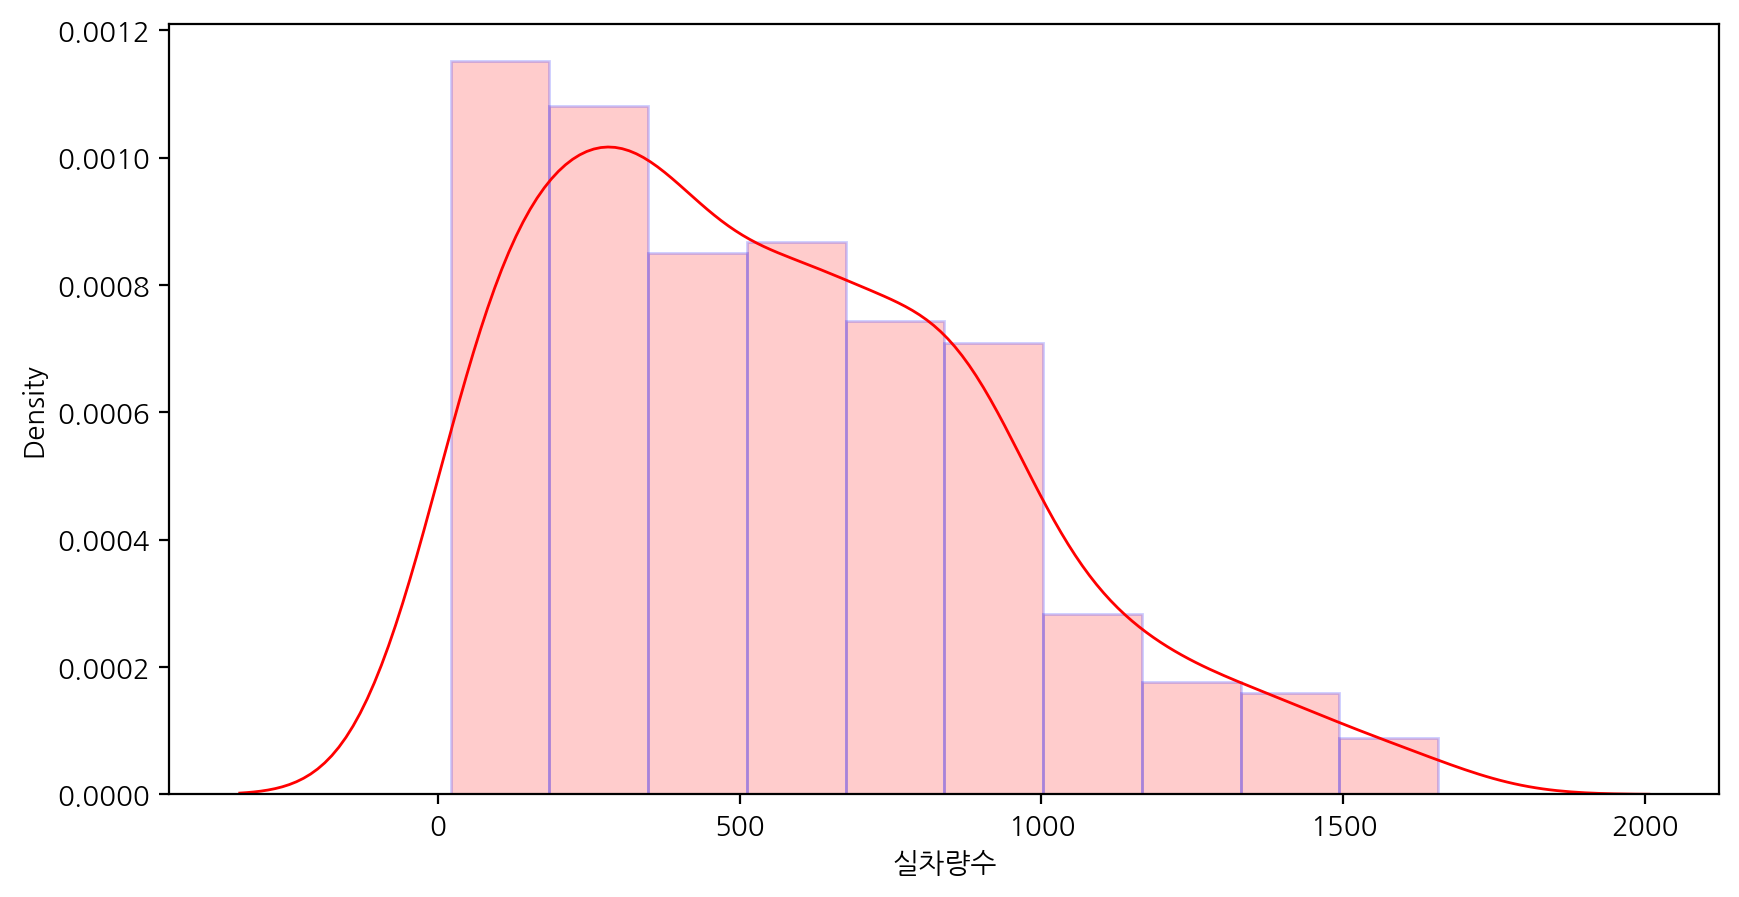

In [185]:
def solution(x):
    plt.figure(figsize=(10,5))
    plt.hist(apart[x], fill=True, bins=10, edgecolor='blue',color='red',alpha=0.2, density=True)
    
    sns.kdeplot(apart[x], color='red', linewidth=1)
    
solution('실차량수')

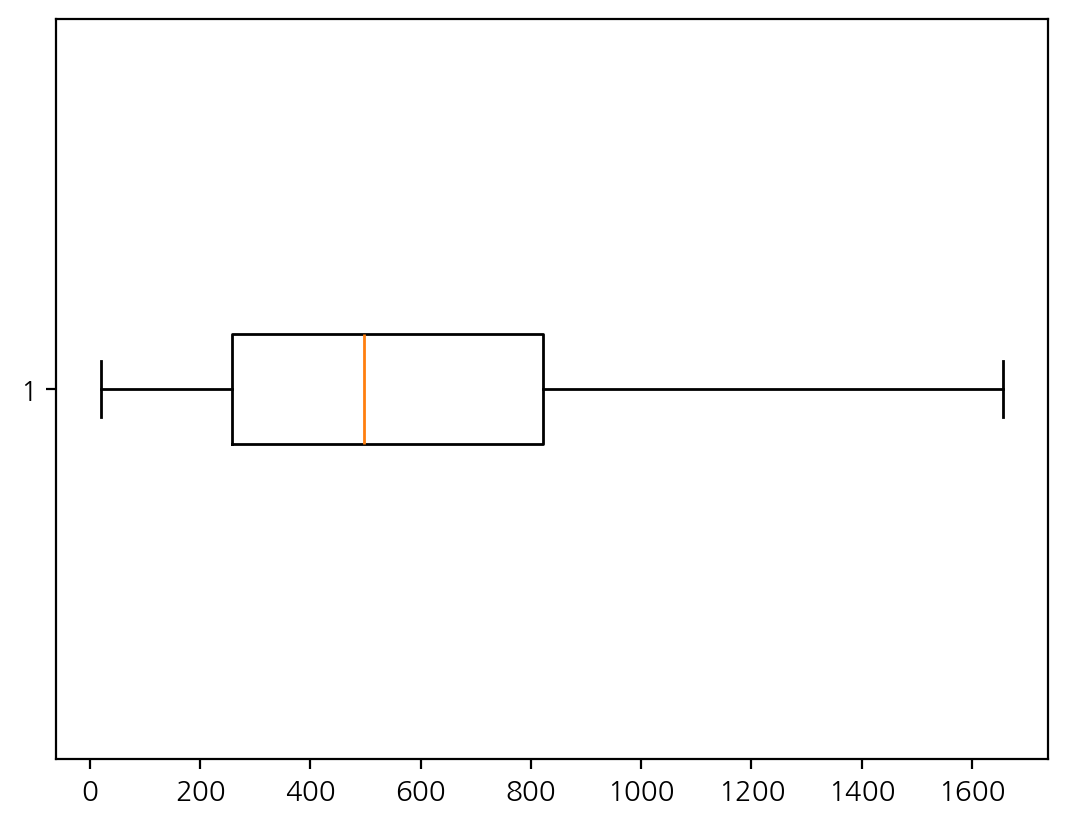

In [24]:
def box(x):
    plt.boxplot(apart[x].dropna(), vert=False)
    plt.show()
box('실차량수')

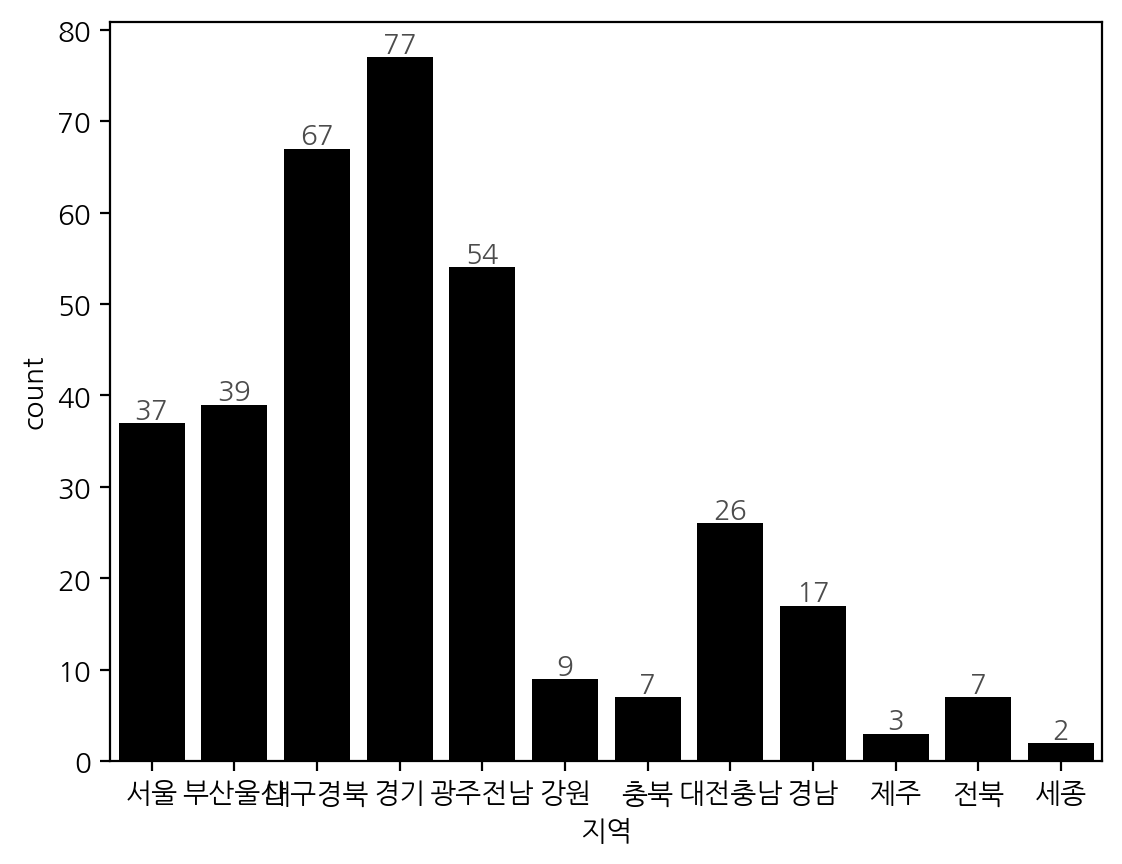

In [111]:
def object1(x):
    ax=sns.countplot(data=apart, x=x, color='black')
    ax.bar_label(ax.containers[0], fontsize=10,alpha=0.7 )
    plt.show()
object1('지역')

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기



#### 1) 실차량수

#### 2) 총세대수

#### 3) 총면적

#### 4) 준공연도

#### 5) 임대료

#### 6) 임대보증금

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기



#### 1) 지역

#### 2) 건물형태

#### 3) 난방방식

#### 4) 승강기설치여부

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

<Axes: >

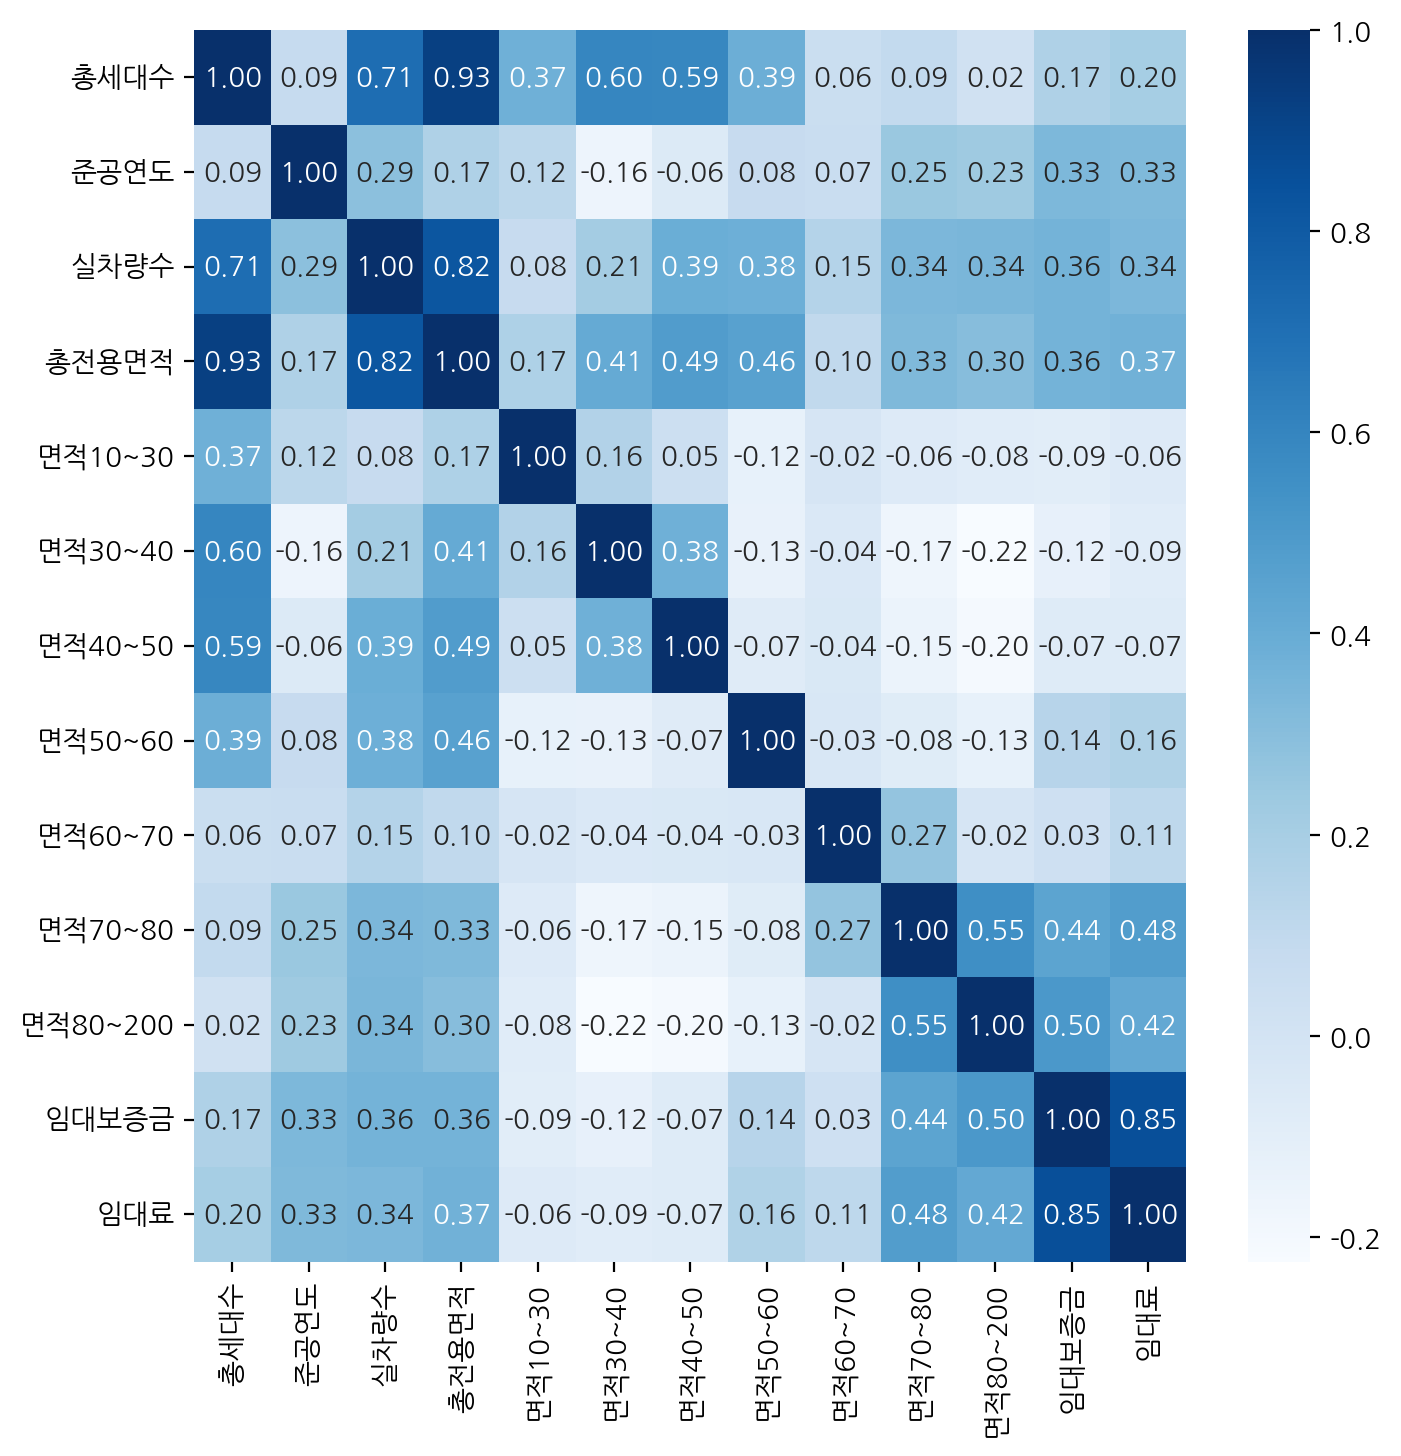

In [202]:
tmp = apart.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(tmp,
            annot=True,
            fmt='.2f',
            cmap='Blues')

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기



#### 1) 변수이름

#### 2) 변수이름

#### 3) 변수이름

#### 4) 변수이름

#### 5) 변수이름

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [253]:
# 함수 만들기
def variable(x,y='실차량수'):
    plt.figure(figsize=(10,5) )
    sns.scatterplot(apart,x=x,y=y)
    plt.grid()
    plt.show()
    


#### 1) 지역

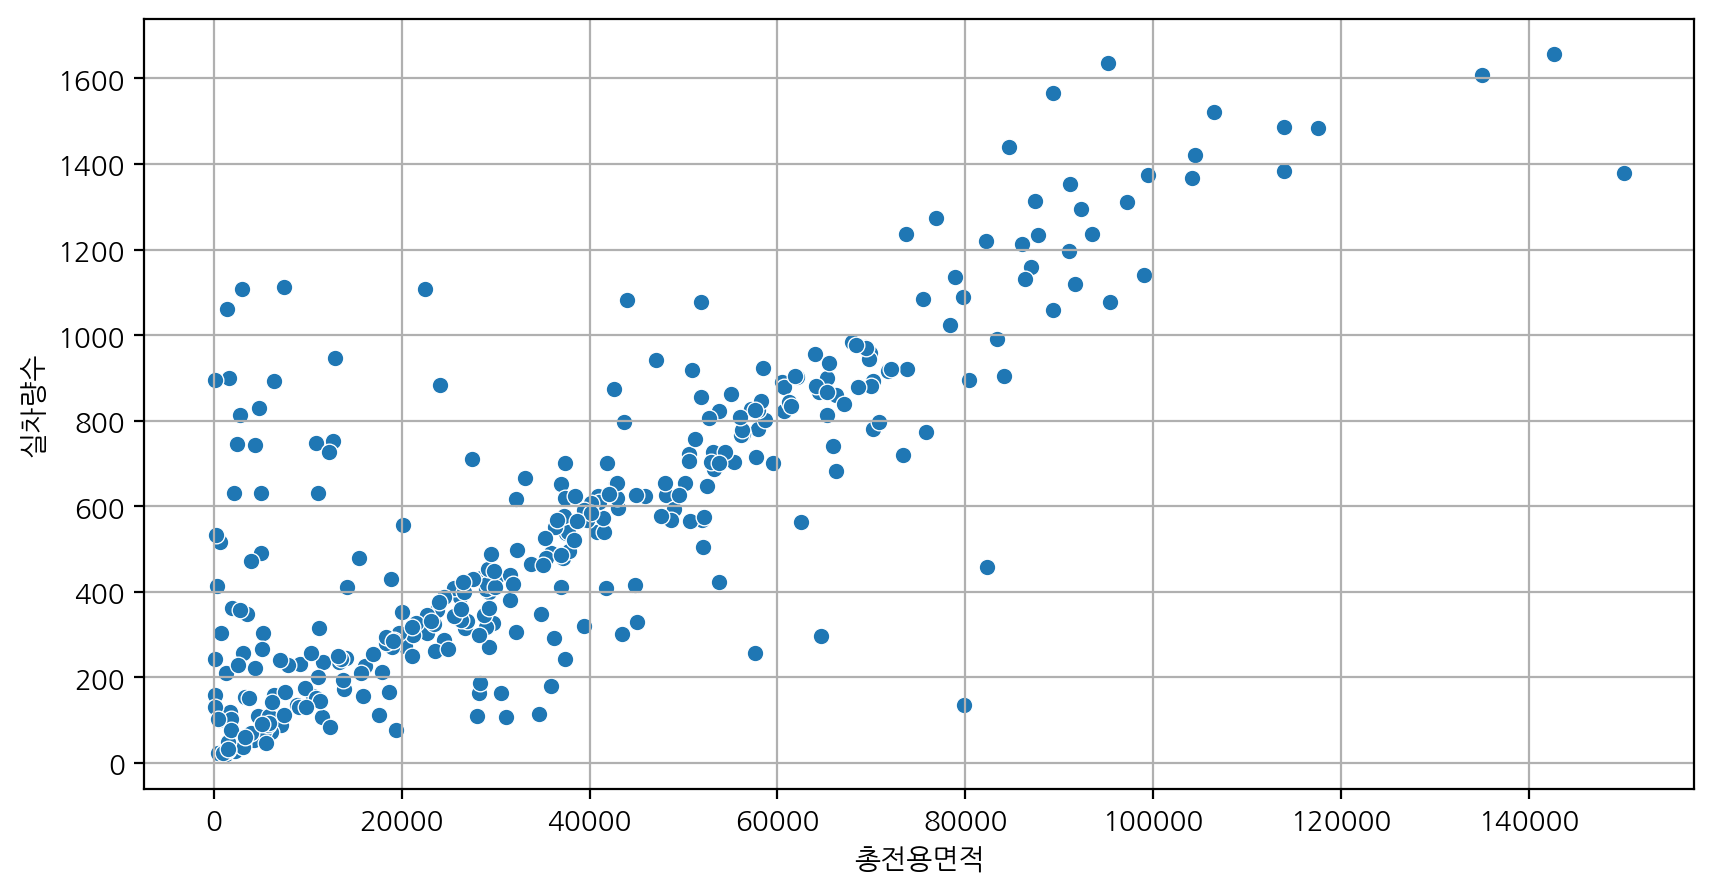

In [255]:
variable('총전용면적', '실차량수')

#### 2) 준공연도

In [287]:
#axhline
def test(x,y='실차량수'):
    plt.axhline(apart[y].mean())
    sns.barplot(apart,x=x,y=y,color='red')
    plt.show()

#### 3) 건물형태

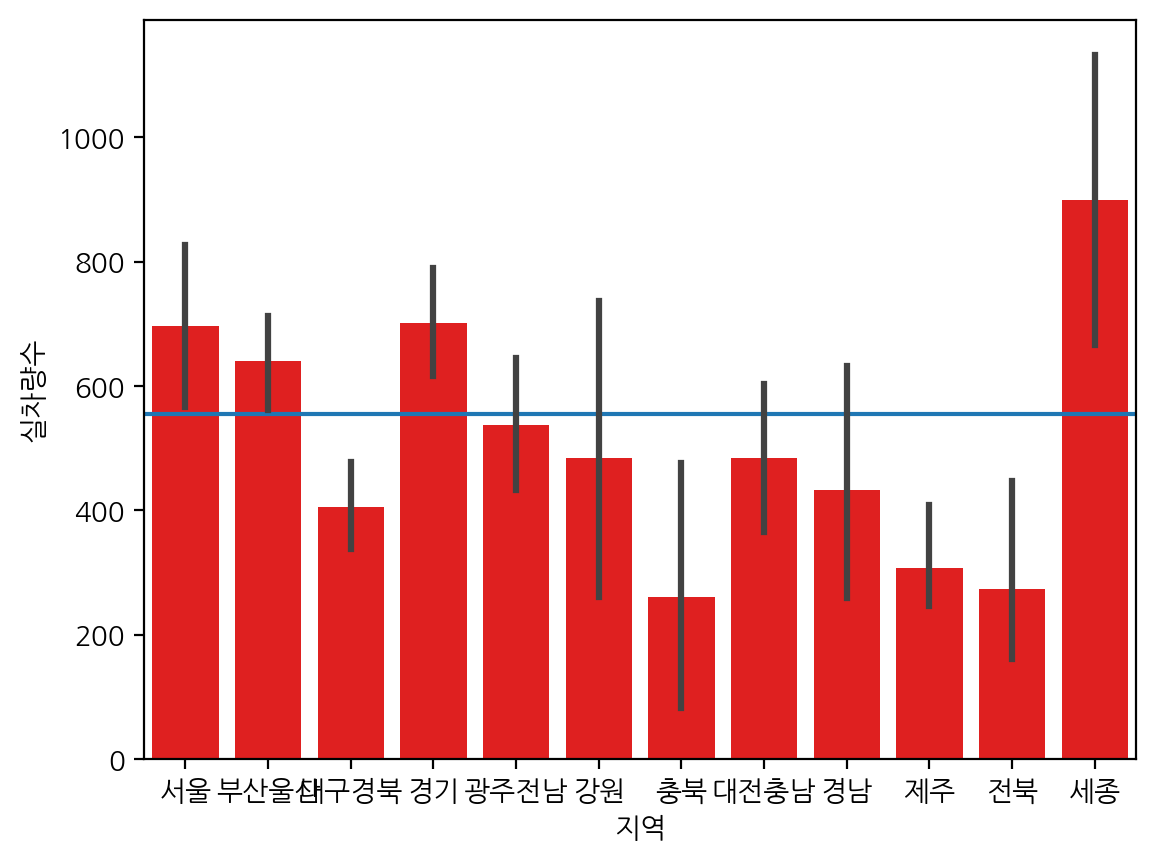

In [289]:
test('지역')

#### 4) 난방방식

#### 5) 승강기설치여부

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [307]:
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

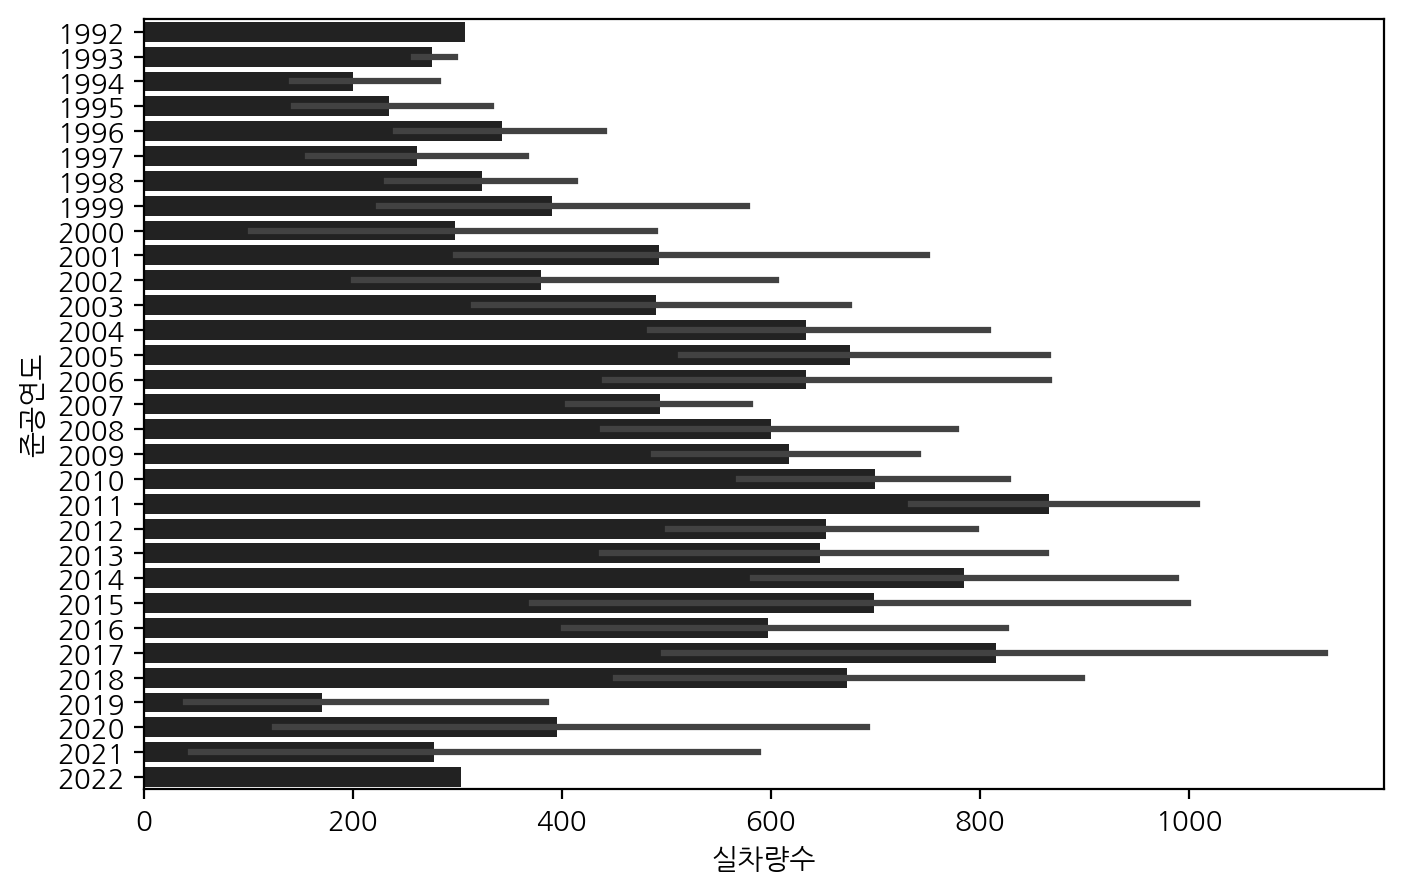

In [304]:
plt.figure(figsize=(8,5))
sns.barplot(data=apart,
            x='실차량수', y='준공연도',
            color='#222222',orient='h')

#plt.grid()
plt.show()


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [309]:
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': 1,
    '일부동 설치': 0,
    '미설치': 0
})

### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [ ]:
apart = apart.drop(['단지코드', '지역'], axis=1)
apart=apart.drop(columns=['단지코드','지역'])

- 최종 데이터를 확인합니다.

## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [ ]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')